In [5]:
import numpy as np
from PIL import Image
from IPython.display import display
import sys

sys.path.append("/Users/jettchen/dev/earthkit/ml")

from src.streetview import get_panorama
from functools import partial

get_panorama = partial(get_panorama, multi_threaded=True)

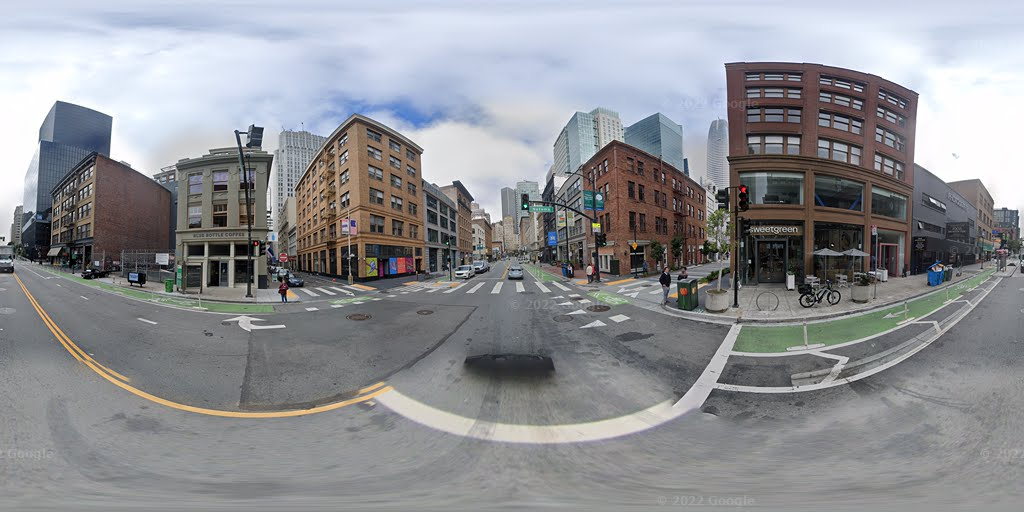

In [23]:
PANO_ID = "yspYtmDKaViJ-G2jZtd8Uw"
pano = get_panorama(PANO_ID, zoom=1)
display(pano)

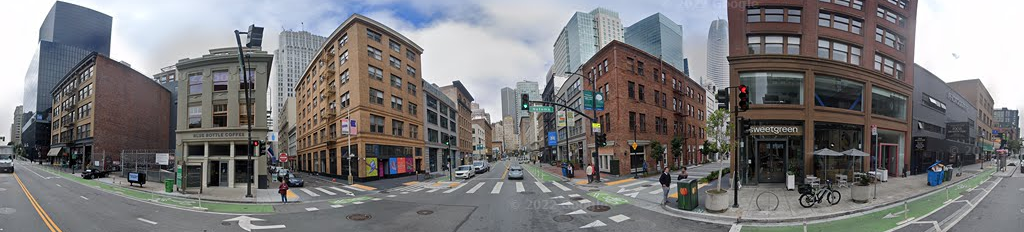

In [31]:
wid, hei = pano.size
M_TOP, M_BOTTOM = 100, 180
cropped = pano.crop((0, M_TOP, wid, hei-M_BOTTOM))
display(cropped)

In [32]:
cropped.size

(1024, 232)

In [26]:
1024/205

4.995121951219512

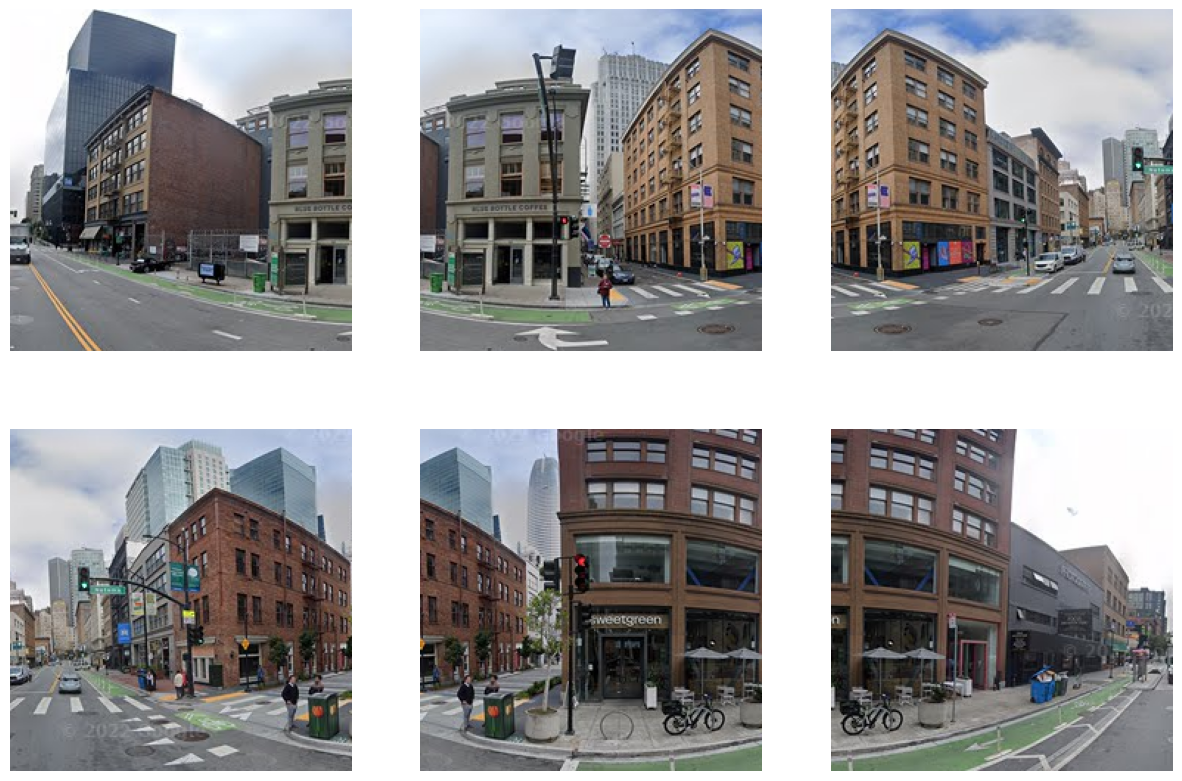

CPU times: user 896 ms, sys: 26.9 ms, total: 923 ms
Wall time: 395 ms


In [40]:
%%time
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

panorama = cropped
wid, hei = panorama.size
num_crops = 6

cropped_images = []
stride = (wid-hei)/(num_crops-1)

for i in range(num_crops):
    left = i * stride
    right = left + hei
    crop_box = (left, 0, right, hei)
    cropped_img = panorama.crop(crop_box)
    cropped_images.append(np.array(cropped_img))

num_rows = 2
num_cols = (num_crops + 1) // num_rows  

# Create a grid to display the cropped images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()
for ax, cropped_img in zip(axes, cropped_images):
    ax.imshow(cropped_img)
    ax.axis('off')
    
for i in range(len(cropped_images), len(axes)):
    axes[i].axis('off')
plt.show()